In [2]:
import pandas as pd

In [3]:
#데이터 73011개 (2019)
df = pd.read_csv("2019-2022 한국소비자원 소비자 위해 정보_20220630.csv", encoding = 'CP949')
df.shape

C:\Users\sshss\AppData\Local\Temp\ipykernel_8508\1288537251.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2019-2022 한국소비자원 소비자 위해 정보_20220630.csv", encoding = 'CP949')


(185558, 13)

In [4]:
# 총 267개
df.query("품목소분류 == '유모차'")

,접수번호,접수일,위해자연령,위해자성별,발생일자,치료기간,품목대분류,품목중분류,품목소분류,위해원인,위해부위 소분류,위해증상 소분류,발생장소 소분류
2333,2.022024e+09,2022-04-13,39.0,여자,2022-04-01,해당없음,가구 및 가구설비,유아용 가구,유모차,기타 불량 및 고장,해당없음,해당없음,상세불명의 주택
2336,2.022024e+09,2022-04-13,39.0,여자,2022-04-04,해당없음,가구 및 가구설비,유아용 가구,유모차,기타 불량 및 고장,해당없음,해당없음,상세불명의 장소
5244,2.022027e+09,2022-04-27,68.0,남자,2022-04-20,해당없음,가구 및 가구설비,유아용 가구,유모차,기타 위험 및 위해내용,해당없음,해당없음,상세불명의 장소
5486,2.022027e+09,2022-04-28,39.0,여자,2022-04-01,해당없음,가구 및 가구설비,유아용 가구,유모차,기타 불량 및 고장,해당없음,해당없음,상세불명의 장소
6622,2.022028e+09,2022-05-03,0.0,여자,2022-03-07,해당없음,가구 및 가구설비,유아용 가구,유모차,추락,머리 및 뇌(뇌막),부종 또는 피부감각장애,아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178513,2.019015e+09,2019-02-26,4.0,남자,2019-01-04,해당없음,가구 및 가구설비,유아용 가구,유모차,추락,"입술, 혀",상세불명의 도로 및 인도,NaN
181178,2.019018e+09,2019-03-14,0.0,남자,2019-01-30,해당없음,가구 및 가구설비,유아용 가구,유모차,추락,코,다세대주택,NaN
181608,2.019019e+09,2019-03-18,NaN,미상,2019-02-27,해당없음,가구 및 가구설비,유아용 가구,유모차,기타 불량 및 고장,해당없음,인도,NaN
183935,2.019021e+09,2019-03-21,39.0,여자,NaN,해당없음,가구 및 가구설비,유아용 가구,유모차,부품탈락,해당없음,상세불명의 장소,NaN


In [5]:
# 위해자 연령 평균연령 13.66세
df1 = df.query('품목소분류 == "유모차"')
df1.groupby('품목소분류').agg(mean_agg = ('위해자연령', 'mean'), median_agg = ('위해자연령', 'median'),
                        max_agg = ('위해자연령', 'max'), min_agg = ('위해자연령', 'min'))


,mean_agg,median_agg,max_agg,min_agg
품목소분류,,,,
유모차,13.126338,2.0,70.0,0.0


In [34]:
# 위험종류별 횟수 #12개
df2 = df.query('품목소분류 == "유모차"').groupby('위해원인').agg(count_agg = ('위해자연령', 'count'))
df3 = df2.sort_values('count_agg', ascending=False)
df3.T

위해원인,추락,기타 화학물질,기타 불량 및 고장,미끄러짐·넘어짐,눌림·끼임,기타 위험 및 위해내용,부품탈락,파열·파손·꺾여짐,부딪힘,기능고장,예리함·마감처리 불량,기타 물리적 충격
count_agg,292,92,20,16,12,9,9,6,4,3,3,1


In [31]:
df1 = df.query('위해자연령 <=2.0')
df2 = df1.query('위해원인 == "추락"').groupby('품목소분류').agg(count_agg = ('위해자연령', 'count'))
df2.sort_values('count_agg', ascending=False).head(7)

,count_agg
품목소분류,
침대,2327
소파,728
기타 의자,330
식탁용 의자,312
침대,291
유모차,257
식탁,188


<AxesSubplot:ylabel='Frequency'>

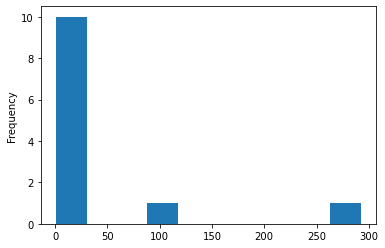

In [7]:
df2['count_agg'].plot.hist()

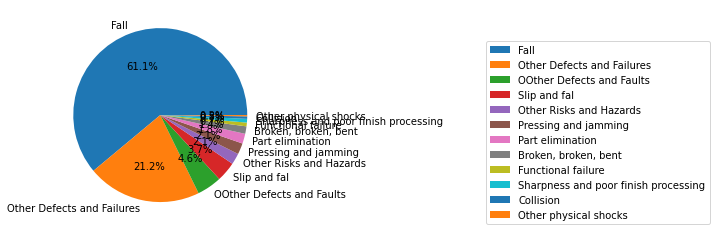

In [8]:
import matplotlib.pyplot as plt

ratio = [265, 92, 20, 16, 9, 9, 8, 6, 3, 3, 2, 1]
labels = ['Fall', 'Other Defects and Failures', 'OOther Defects and Faults',
          'Slip and fal', 'Other Risks and Hazards', 'Pressing and jamming', 
         'Part elimination', 'Broken, broken, bent', 'Functional failure', 'Sharpness and poor finish processing',
         'Collision', 'Other physical shocks']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.legend(loc = (2, 0.0))
plt.show()

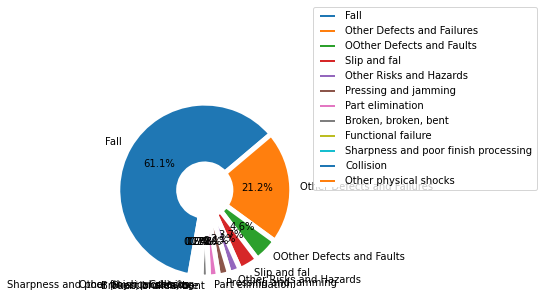

In [9]:
# 부채꼴 스타일 지정하기
import matplotlib.pyplot as plt

ratio = [265, 92, 20, 16, 9, 9, 8, 6, 3, 3, 2, 1]
labels = ['Fall', 'Other Defects and Failures', 'OOther Defects and Faults',
          'Slip and fal', 'Other Risks and Hazards', 'Pressing and jamming', 
         'Part elimination', 'Broken, broken, bent', 'Functional failure', 'Sharpness and poor finish processing',
         'Collision', 'Other physical shocks']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}


plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops)
plt.legend(loc = (1, 0.5))
plt.show()
